<a href="https://colab.research.google.com/github/himanshu230998/CS504-project/blob/main/Double_Pendulum_Non_Chaotic_4_input_1_output_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pickle
from itertools import *

import csv

import matplotlib.animation as animation
import random
import matplotlib.patches as mpatches
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import r2_score
import pandas as pd
import tensorflow as tf


from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 2.0  # mass of pendulum 2 in kg

# derivs(state,t) returns array of 4 number [Z1, Z1_dot, Z2, Z2_dot]
def derivs(state, t):
    
    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_) #del1=L1*(M1+M2*sin(del)*sin(del))
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

def data():  
    dt = 0.01
    t = np.arange(0.0, 100 , dt)      
    len(t)
    arr=[]
    time=[]

    state = np.radians([5, 0, 4, 0]) #theta1, theta1dot, theta2, theta2dot
    y = integrate.odeint(derivs, state, t)   
    x1 = 1 * sin(y[:, 0])
    y1 = -1 * cos(y[:, 0])
    x2 = 1 * sin(y[:, 2]) + x1
    y2 = -1 * cos(y[:, 2]) + y1
    for i in range(len(x1)):
        all=[x1[i],y1[i],x2[i],y2[i]]
 
        tm = [t[i]]
        time.append(tm)
        arr.append(all)
    return time, arr

t = data()[0]
arr = data()[1]

print(len(arr))
traindataX = np.array(arr[:8000])
testdataX = np.array(arr[8000:])

10000


In [ ]:
trainsetX1 = []
trainoutX1 = []
trainoutY1 = []
trainoutX2 = []
trainoutY2 = []
testsetX = []


In [ ]:
n_future = 1
n_past = 200

In [ ]:
testsetx1 = []
testsety1 = []
testsetx2 = []
testsety2 = []

In [ ]:
for i in range(n_past, len(traindataX) - n_future +1):
    trainsetX1.append(traindataX[i - n_past:i, 0:traindataX.shape[1]])
    trainoutX1.append(traindataX[i + n_future - 1:i + n_future, 0])
    trainoutY1.append(traindataX[i + n_future - 1:i + n_future, 1])
    trainoutX2.append(traindataX[i + n_future - 1:i + n_future, 2])
    trainoutY2.append(traindataX[i + n_future - 1:i + n_future, 3]) 

In [ ]:
trainX, trainX1, trainY1, trainX2, trainY2 = np.array(trainsetX1), np.array(trainoutX1), np.array(trainoutY1), np.array(trainoutX2), np.array(trainoutY2)

In [ ]:
for i in range(n_past, len(testdataX) - n_future +1):
    testsetX.append(testdataX[i - n_past:i, 0:testdataX.shape[1]])
    testsetx1.append(testdataX[i + n_future - 1:i + n_future, 0])
    testsety1.append(testdataX[i + n_future - 1:i + n_future, 1]) 
    testsetx2.append(testdataX[i + n_future - 1:i + n_future, 2]) 
    testsety2.append(testdataX[i + n_future - 1:i + n_future, 3])  

In [ ]:
testx1 = np.array(testsetx1)
testx2 = np.array(testsetx2)
testy1 = np.array(testsety1)
testy2 = np.array(testsety2)

In [ ]:
len(testx1)

1800

In [ ]:
testX = np.array(testsetX)

In [ ]:
testX[200:]

array([[[-0.03267818, -0.99946593, -0.0491598 , -1.99933009],
        [-0.03511106, -0.99938342, -0.05247911, -1.99923258],
        [-0.03747442, -0.99929759, -0.05578131, -1.99913   ],
        ...,
        [ 0.06140164, -0.99811314,  0.15945843, -1.99329396],
        [ 0.06198748, -0.99807693,  0.15852334, -1.99340643],
        [ 0.06258029, -0.99803993,  0.15749385, -1.99352545]],

       [[-0.03511106, -0.99938342, -0.05247911, -1.99923258],
        [-0.03747442, -0.99929759, -0.05578131, -1.99913   ],
        [-0.03976316, -0.99920913, -0.05906547, -1.99902283],
        ...,
        [ 0.06198748, -0.99807693,  0.15852334, -1.99340643],
        [ 0.06258029, -0.99803993,  0.15749385, -1.99352545],
        [ 0.06317521, -0.99800245,  0.15637148, -1.99365021]],

       [[-0.03747442, -0.99929759, -0.05578131, -1.99913   ],
        [-0.03976316, -0.99920913, -0.05906547, -1.99902283],
        [-0.04197254, -0.99911876, -0.06233063, -1.99891152],
        ...,
        [ 0.06258029, -0.99

In [ ]:
testX[200]

array([[-3.26781828e-02, -9.99465926e-01, -4.91598039e-02,
        -1.99933009e+00],
       [-3.51110564e-02, -9.99383417e-01, -5.24791147e-02,
        -1.99923258e+00],
       [-3.74744158e-02, -9.99297587e-01, -5.57813100e-02,
        -1.99913000e+00],
       [-3.97631635e-02, -9.99209133e-01, -5.90654728e-02,
        -1.99902283e+00],
       [-4.19725389e-02, -9.99118765e-01, -6.23306312e-02,
        -1.99891152e+00],
       [-4.40981384e-02, -9.99027204e-01, -6.55757546e-02,
        -1.99879653e+00],
       [-4.61359341e-02, -9.98935171e-01, -6.87997501e-02,
        -1.99867831e+00],
       [-4.80822905e-02, -9.98843378e-01, -7.20014599e-02,
        -1.99855727e+00],
       [-4.99339786e-02, -9.98752521e-01, -7.51796581e-02,
        -1.99843380e+00],
       [-5.16881877e-02, -9.98663272e-01, -7.83330492e-02,
        -1.99830823e+00],
       [-5.33425362e-02, -9.98576273e-01, -8.14602656e-02,
        -1.99818089e+00],
       [-5.48950786e-02, -9.98492128e-01, -8.45598673e-02,
      

In [ ]:
trainX.shape

(7800, 200, 4)

In [ ]:
model = Sequential()
model.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainX1.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 64)           17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1 = Sequential()
model1.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model1.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model1.add(Dropout(0.3))
model1.add(Dense(trainY1.shape[1]))

model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200, 64)           17664     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2 = Sequential()
model2.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model2.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model2.add(Dropout(0.3))
model2.add(Dense(trainX2.shape[1]))

model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200, 64)           17664     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3 = Sequential()
model3.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model3.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model3.add(Dropout(0.3))
model3.add(Dense(trainY2.shape[1]))

model3.compile(optimizer='adam', loss='mse')
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200, 64)           17664     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainX1, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 37s 167ms/step - loss: 9.1264e-04 - val_loss: 1.7304e-04
Epoch 2/6
220/220 [==============================] - 37s 166ms/step - loss: 2.1089e-04 - val_loss: 5.4096e-05
Epoch 3/6
220/220 [==============================] - 35s 160ms/step - loss: 1.3053e-04 - val_loss: 2.9892e-05
Epoch 4/6
220/220 [==============================] - 35s 159ms/step - loss: 1.0107e-04 - val_loss: 2.6139e-05
Epoch 5/6
220/220 [==============================] - 36s 162ms/step - loss: 8.3665e-05 - val_loss: 7.0605e-05
Epoch 6/6
220/220 [==============================] - 35s 160ms/step - loss: 7.1219e-05 - val_loss: 1.0983e-05


In [ ]:
history1 = model1.fit(trainX, trainY1, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 36s 161ms/step - loss: 0.0661 - val_loss: 1.2880e-04
Epoch 2/6
220/220 [==============================] - 35s 159ms/step - loss: 0.0146 - val_loss: 0.0014
Epoch 3/6
220/220 [==============================] - 35s 159ms/step - loss: 0.0127 - val_loss: 3.0211e-05
Epoch 4/6
220/220 [==============================] - 35s 160ms/step - loss: 0.0116 - val_loss: 7.7632e-04
Epoch 5/6
220/220 [==============================] - 35s 160ms/step - loss: 0.0105 - val_loss: 1.7180e-04
Epoch 6/6
220/220 [==============================] - 35s 161ms/step - loss: 0.0097 - val_loss: 2.7286e-04


In [ ]:
history2 = model2.fit(trainX, trainX2, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 36s 163ms/step - loss: 0.0028 - val_loss: 5.6468e-04
Epoch 2/6
220/220 [==============================] - 35s 161ms/step - loss: 5.6283e-04 - val_loss: 1.0620e-04
Epoch 3/6
220/220 [==============================] - 36s 164ms/step - loss: 4.3375e-04 - val_loss: 4.6609e-05
Epoch 4/6
220/220 [==============================] - 36s 164ms/step - loss: 3.6261e-04 - val_loss: 2.1283e-05
Epoch 5/6
220/220 [==============================] - 35s 161ms/step - loss: 3.2080e-04 - val_loss: 8.4789e-05
Epoch 6/6
220/220 [==============================] - 36s 162ms/step - loss: 2.9790e-04 - val_loss: 2.7393e-05


In [ ]:
history3 = model3.fit(trainX, trainY2, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 36s 165ms/step - loss: 0.1726 - val_loss: 6.5437e-06
Epoch 2/6
220/220 [==============================] - 37s 166ms/step - loss: 0.0564 - val_loss: 0.0032
Epoch 3/6
220/220 [==============================] - 36s 164ms/step - loss: 0.0526 - val_loss: 9.9178e-04
Epoch 4/6
220/220 [==============================] - 36s 164ms/step - loss: 0.0500 - val_loss: 0.0065
Epoch 5/6
220/220 [==============================] - 36s 163ms/step - loss: 0.0470 - val_loss: 1.1482e-05
Epoch 6/6
220/220 [==============================] - 36s 163ms/step - loss: 0.0441 - val_loss: 3.7237e-05


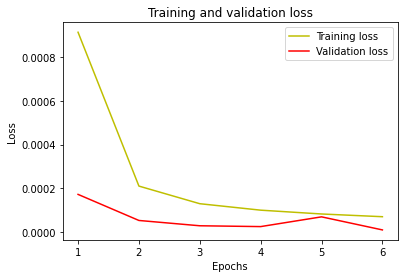

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

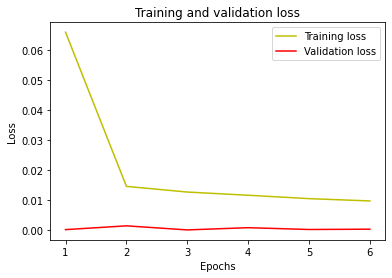

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

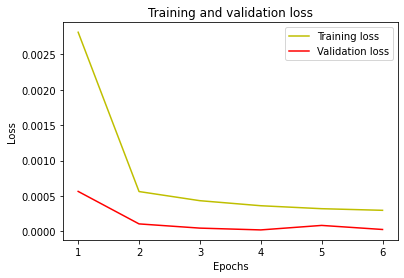

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

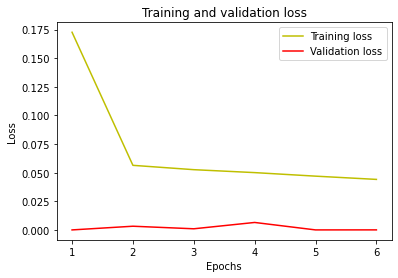

In [ ]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
n_future=1800
forecastx1 = model.predict(testX[0:n_future])
forecasty1 = model1.predict(testX[0:n_future])
forecastx2 = model2.predict(testX[0:n_future])
forecasty2 = model3.predict(testX[0:n_future])

In [ ]:
len(forecastx1)

1800

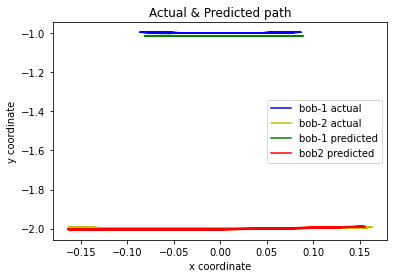

In [ ]:
plt.plot(testx1, testy1, 'b', label='bob-1 actual')
plt.plot(testx2, testy2, 'y', label='bob-2 actual')
plt.plot(forecastx1, forecasty1, 'g', label='bob-1 predicted')
plt.plot(forecastx2, forecasty2, 'r', label='bob2 predicted')
plt.title('Actual & Predicted path')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
plt.show()

In [ ]:
m = Sequential()
m.add(LSTM(4, input_shape=(1, 1)))
m.add(Dense(1))
m.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
